In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


companies = pd.read_csv('companies.csv', usecols=["organizationName", "country", "revenue", "profits", "assets", "marketValue"])
companies = companies.rename(columns={'organizationName': 'name'})

In [2]:
 def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
        """Cleans the dataframe by removing missing values, duplicates, and converting the 'B' and 'M' values to numbers."""

        # Drop rows with missing values
        df = df.dropna()

        # Drop duplicate rows
        df = df.drop_duplicates()

        # Clean the 'B' values in the specified columns
        def clean_and_convert(value):
            if "B" in value:
                return (
                    float(value.replace(" B", "").replace(",", "")) * 1e9
                )  # Convert to billions
            elif "M" in value:
                return (
                    float(value.replace(" M", "").replace(",", "")) * 1e6
                )  # Convert to millions
            else:
                return float(value.replace(",", ""))

        # Apply the function to clean and convert the 'B' and 'M' values in the specified columns
        columns_to_clean = ["revenue", "profits", "assets", "marketValue"]

        for column in columns_to_clean:
            df[column] = df[column].apply(clean_and_convert)

        return df

In [4]:
companies = clean_dataframe(companies)

companies.head()

,name,country,revenue,profits,assets,marketValue
0,JPMorgan Chase,United States,1.799300e+11,4.180000e+10,3.744300e+12,3.995900e+11
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,5.894700e+11,1.563600e+11,6.609900e+11,2.055220e+12
2,ICBC,China,2.167700e+11,5.247000e+10,6.116820e+12,2.030100e+11
3,China Construction Bank,China,2.030800e+11,4.825000e+10,4.977480e+12,1.729900e+11
4,Agricultural Bank of China,China,1.861400e+11,3.792000e+10,5.356860e+12,1.418200e+11


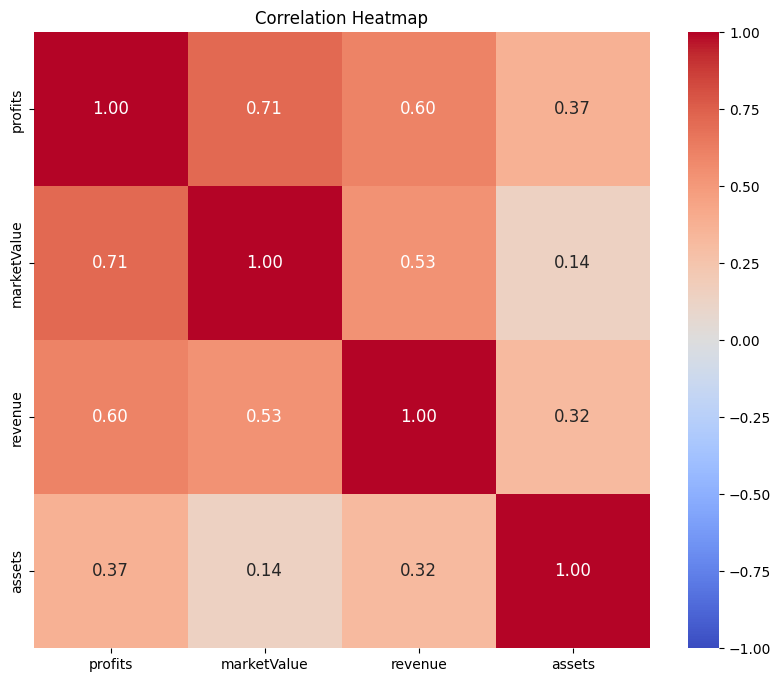

In [22]:
# Compute the correlation matrix
corr_matrix = companies[['profits', 'marketValue', 'revenue', 'assets']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f", annot_kws={"size": 12})

plt.title('Correlation Heatmap')

plt.show()

<Axes: xlabel='profits', ylabel='marketValue'>

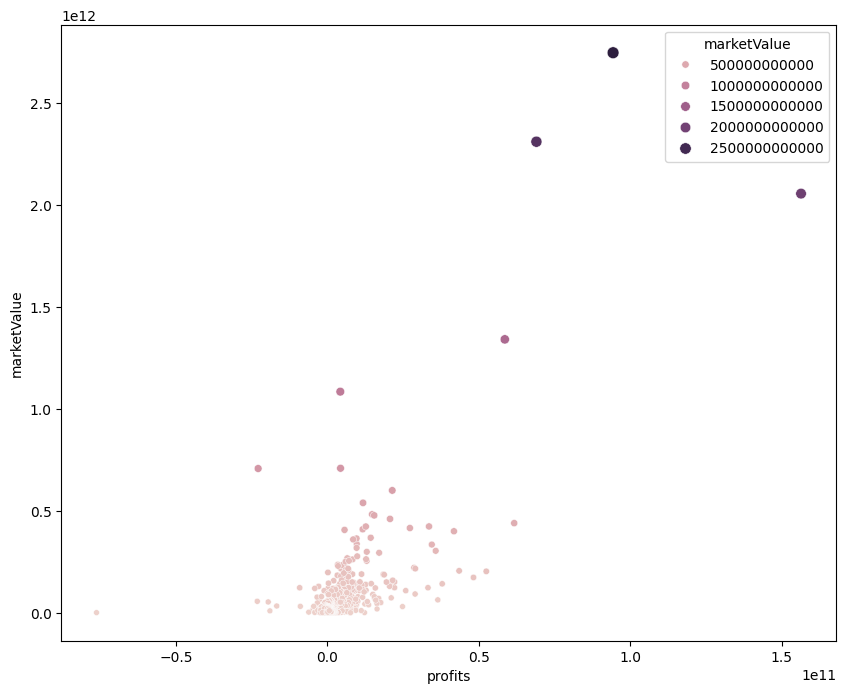

In [30]:
# According to the heatmap, it would be interesting to take a closer look at the correlation between
# profits and market value, since it seams highly correlated

plt.figure(figsize=(10, 8))
sns.scatterplot(data = companies, x = 'profits', y = 'marketValue', hue = 'marketValue', size='marketValue')

